In [114]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [115]:
data = pd.read_csv('balanced_migraine_data.csv')
df = data.drop_duplicates()

In [116]:
label_encoder = LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])

C:\Users\diya0\AppData\Local\Temp\ipykernel_13000\3237947895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = label_encoder.fit_transform(df['Type'])


In [117]:
X = df.drop(columns=['Type'])
y = df['Type']

In [118]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert the target variable to categorical (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [129]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.7))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.7))
model.add(Dense(y_train.shape[1], activation='softmax'))

In [130]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [131]:

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

In [132]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.3)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.1929 - loss: 3.3175 - val_accuracy: 0.5895 - val_loss: 1.5954
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3251 - loss: 2.2237 - val_accuracy: 0.6812 - val_loss: 1.3466
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4516 - loss: 1.6458 - val_accuracy: 0.7249 - val_loss: 1.1789
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5292 - loss: 1.5401 - val_accuracy: 0.7293 - val_loss: 1.0550
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6026 - loss: 1.2361 - val_accuracy: 0.7467 - val_loss: 0.9570
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6246 - loss: 1.1015 - val_accuracy: 0.7555 - val_loss: 0.8786
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6749 - loss: 1.0603 - val_accuracy: 0.7555 - val_loss: 0.8163
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6945 - loss: 1.0002 - val_accuracy: 0.7598 - 

In [133]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [134]:

print(accuracy_score(y_true, y_pred_classes))
print(precision_score(y_true, y_pred_classes, average="macro"))
print(recall_score(y_true, y_pred_classes, average="macro"))

0.8952879581151832
0.91111364269259
0.8565171865171866


In [135]:

conf_matrix = confusion_matrix(y_true, y_pred_classes)
print(conf_matrix)

[[16  3  1  0  0  5  0]
 [ 1 16  0  0  0  3  0]
 [ 0  0 31  0  0  0  0]
 [ 0  0  1 26  0  0  0]
 [ 2  0  0  0  8  3  0]
 [ 0  1  0  0  0 43  0]
 [ 0  0  0  0  0  0 31]]


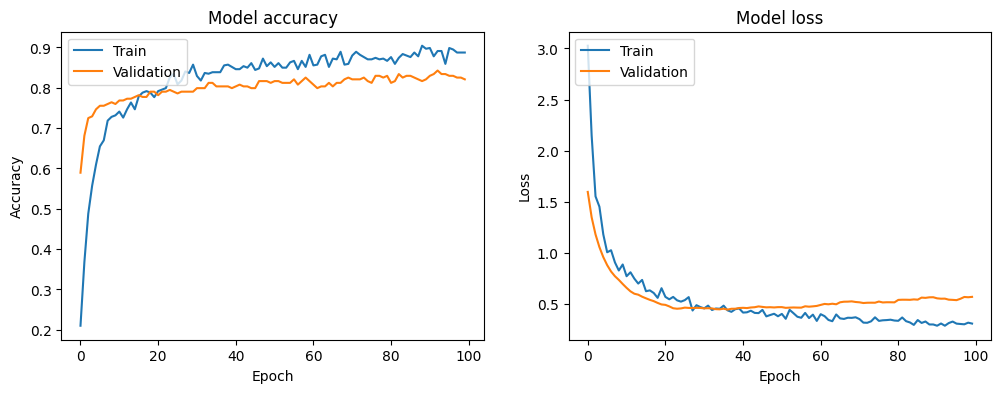

In [136]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()